## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [68]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [69]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


c. The number of unique users in the dataset.

In [71]:
# number of unique users

df['user_id'].nunique() 

290584

d. The proportion of users converted.

In [72]:
convert_ctr = df.query('converted == "1"')['user_id'].nunique() / df['user_id'].nunique()
convert_ctr

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't line up.

#From review: Please consider also the samples that "df['group'] != "treatment" where 'landing_page'] == "new_page".

In [73]:
#Find out in how many rows group is treatment but landing page is not new page

df_treatment = df[df['group'] == "treatment"]
df_treatment.head()
no_line_up = df_treatment[df_treatment['landing_page'] != "new_page"]

no_line_up.count()

user_id         1965
timestamp       1965
group           1965
landing_page    1965
converted       1965
dtype: int64

In [74]:
#Find out in how many rows group is control but landing page is not old page
df_control = df[df['group'] == "control"]
df_control.head()
no_line_up_control = df_control[df_control['landing_page'] != "old_page"]
no_line_up_control.count()

user_id         1928
timestamp       1928
group           1928
landing_page    1928
converted       1928
dtype: int64

In [75]:
answer_e=no_line_up.count()+no_line_up_control.count()
print(answer_e)

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64


f. Do any of the rows have missing values?

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [77]:
#Creating df1a where group is treatment and landing page is new page
df1a = df[(df['group']  == "treatment") & (df['landing_page'] == 'new_page')]


In [78]:
#Creating df1b where group is treatment and landing page is new page
df1b = df[(df['group']  == "control") & (df['landing_page'] == 'old_page')]


In [79]:
#concatinating df1a and df1b
frames = [df1a, df1b]
df2 = pd.concat(frames)

In [80]:
df2.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [81]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [82]:
df2['user_id'].nunique()


290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [83]:
df2[df2.duplicated(["user_id"], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

Rows 1899 and 2893

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [84]:
df2.drop_duplicates(['user_id'], keep='last', inplace=True)

In [85]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 2 to 294476
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [86]:
df2[df2.duplicated(["user_id"], keep=False)]

,user_id,timestamp,group,landing_page,converted


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [87]:
all_ctr = df2.query('converted == "1"')['user_id'].nunique() / df2['user_id'].nunique()
all_ctr

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [88]:
df_control = df2.query('group == "control"')
control_ctr = df_control.query('converted == "1"')['user_id'].nunique() / df_control['user_id'].nunique()
control_ctr

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [89]:
df_treatment = df2.query('group == "treatment"')
treatment_ctr = df_treatment.query('converted == "1"')['user_id'].nunique() / df_treatment['user_id'].nunique()
treatment_ctr

0.11880806551510564

In [90]:
#Checking that calculating with treatment or new page gets the same results
df_new = df2.query('landing_page == "new_page"')
new_ctr = df_treatment.query('converted == "1"')['user_id'].nunique() / df_new['user_id'].nunique()
new_ctr

0.11880806551510564

d. What is the probability that an individual received the new page?

In [91]:
new_prop = df2.query('landing_page == "new_page"')['user_id'].nunique() / df2['user_id'].nunique()
new_prop

0.5000619442226688

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

The conversion rate in the control group is slightly higher. New and old pages were shown nearly equaly. This does not support the theory that the new page will lead to better conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

H 0: P new <= P old

H 1: P new > P old

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [92]:
all_ctr = df2.query('converted == "1"')['user_id'].nunique() / df2['user_id'].nunique()
all_ctr

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [93]:
all_ctr = df2.query('converted == "1"')['user_id'].nunique() / df2['user_id'].nunique()
all_ctr
#p_new = df2['converted'].mean()

0.11959708724499628

c. What is $n_{new}$?

In [94]:
n_new=df2.query('group == "treatment"')['user_id'].count()
n_new

145310

d. What is $n_{old}$?

In [95]:
n_old=df2.query('group == "control"')['user_id'].count()
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.


In [96]:
new_page_converted = np.random.binomial(1, all_ctr, n_new)

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [97]:
old_page_converted = np.random.binomial(1, all_ctr, n_old)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

Under the null hypothesis $p_{new}$ = $p_{old}$, so the answer to this question is 0

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.




In [98]:
p_diffs = np.random.binomial(n_new, all_ctr, 10000)/n_new - np.random.binomial(n_old, all_ctr, 10000)/n_old
print(p_diffs)

[ 3.00579756e-04  1.87683634e-03 -1.70211720e-03 ... -1.04114347e-03
 -1.51644057e-03  4.60011754e-05]


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

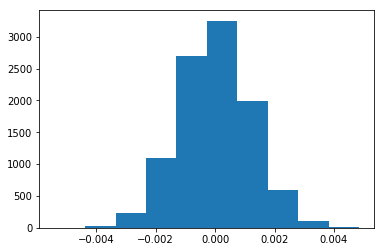

In [99]:
diffs = np.array(p_diffs)
plt.hist(diffs);

We are trying to find out, what is the difference in conversion rate for users seeing the new page vs. users seeking the old page
We simulate the sampling distribution by creating a difference list with bootstrapping and visualizing in a histogram.
This Histogram suggests that there is a small difference between conversion rate for users seeing the old page.
It looks close to a normal distribution.



In [100]:
null_vals = np.random.normal(0, diffs.std(), diffs.size)

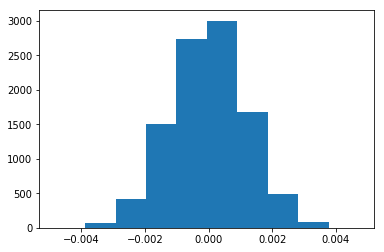

In [101]:
plt.hist(null_vals);

j. What proportion of the p_diffs are greater than the actual difference observed in ab_data.csv?


In [102]:
a_diff = df2[df2['group'] == 'treatment']['converted'].mean() -  df2[df2['group'] == 'control']['converted'].mean()
print(a_diff)
(a_diff < p_diffs).mean()



-0.0015782389853555567


0.909

k. In words, explain what you just computed in part j.. What is this value called in scientific studies? What does this value mean in terms of whether or not there is a difference between the new and old pages?

Answer: If our null hypothesis is, that the treatment page performs worse then the control page (0 and Alternative Hypothesis from Part II 1.), this would be  the p value.
P value is the probability of obtaining an effect at least as extreme as the one in our sample data, assuming the truth of the null hypothesis.
This p value indicates we fail to reject the null hypothesis.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [103]:
import statsmodels.api as sm

convert_old = df2.query('group == "control"').query('converted == "1"')['user_id'].nunique()
convert_new = df2.query('group == "treatment"').query('converted == "1"')['user_id'].nunique() 
n_old = df2.query('group == "control"')['user_id'].count()
n_new = df2.query('group == "treatment"')['user_id'].count()

print(n_old)
print(n_new)

print(convert_old)
print(convert_new)

145274
145310
17489
17264


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.


Comment from review: For the z-test, since the alternative hypothesis is directional it is important to use a one-tailed test, you do that simply by providing the correct value for the "alternative" parameter in the "proportions_ztest" function. Keep in mind that the result from the z-test should be similar to the simulation.

In [104]:
import statsmodels.api as sm
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')

print(z_score)
print(p_value)




1.3109241984234394
0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [105]:
#Using scipy as demonstrated in the instructor link: http://knowledgetack.com/python/statsmodels/proportions_ztest/

from scipy.stats import norm

 # Tells us how significant our z-score is

(norm.ppf(1-(0.05)))



1.6448536269514722

Since the z-score of -1.311 is less then the critical value of 1.64485362695147224, we fail to reject the null hypothesis, meaning the new page does not perform differently from the old page.

This p value is considered large, (> 0.05)  and indicates weak evidence against the null hypothesis.




<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Answer a: Logistic regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [106]:
 import statsmodels.api as sm;

In [107]:
df2.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [108]:
group_dummies = pd.get_dummies(df2['group'])
df2_new = df2.join(group_dummies)
df2_new.head()

,user_id,timestamp,group,landing_page,converted,control,treatment
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,0,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,0,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [109]:
df2_new['intercept'] = 1
logit_mod = sm.Logit(df2_new['converted'], df2_new[['intercept','treatment']])
results = logit_mod.fit()
results.summary()



Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 07 Aug 2018   Pseudo R-squ.:               8.077e-06
Time:                        10:05:05   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
treatment     -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [110]:
#exponent of treatment
np.exp(-0.0150)

0.9851119396030626

Interpretation: Conversion is 0.98511 times as likely when the page is treatment. Holding all else constant.

In [111]:
1/np.exp(-0.0150)

1.015113064615719

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

The p value of 0.190 indicates that the influence is not statistically relevant. Interpretation: Conversion is 0.98511 times as likely when the page is treatment. Holding all else constant. This is very close to having no influence.

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

The p value is 0.190 and with this different from Part II. Part II was a one tailed test, which explains the difference.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?


**A linear relationship does not exist**
There might not be a relationship between the response and predictor variable, this might make the predictions meaningless
**Correlated errors might occur**
This can happen when data are related
**Non-Constant variance**
Non-constant variance happens when the  predicted values differs depending on which value is being predicted
**Outliers **
**Multicollinearity**
Two predictor variables are correlated with one another

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [112]:
df_c = pd.read_csv('countries.csv')
df_c.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [113]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290584 entries, 0 to 290583
Data columns (total 2 columns):
user_id    290584 non-null int64
country    290584 non-null object
dtypes: int64(1), object(1)
memory usage: 4.4+ MB


In [114]:
df2_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 2 to 294476
Data columns (total 8 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
control         290584 non-null uint8
treatment       290584 non-null uint8
intercept       290584 non-null int64
dtypes: int64(3), object(3), uint8(2)
memory usage: 26.1+ MB


In [115]:
df2_new.head()

,user_id,timestamp,group,landing_page,converted,control,treatment,intercept
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,0,1,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,0,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,0,1,1


In [116]:
df2_new=df2_new.merge(df_c,on="user_id", how="left")

In [117]:
df2_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 290583
Data columns (total 9 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
control         290584 non-null uint8
treatment       290584 non-null uint8
intercept       290584 non-null int64
country         290584 non-null object
dtypes: int64(3), object(4), uint8(2)
memory usage: 18.3+ MB


In [118]:
df2_new.head()

,user_id,timestamp,group,landing_page,converted,control,treatment,intercept,country
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1,1,US
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1,1,US
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,0,1,1,CA
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,0,1,1,UK
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,0,1,1,CA


In [119]:
country_dummies = pd.get_dummies(df2_new['country'])
df2_new = df2_new.join(country_dummies)
df2_new.head()




,user_id,timestamp,group,landing_page,converted,control,treatment,intercept,country,CA,UK,US
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1,1,US,0,0,1
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1,1,US,0,0,1
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,0,1,1,CA,1,0,0
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,0,1,1,UK,0,1,0
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,0,1,1,CA,1,0,0


In [120]:
df2_new['intercept'] = 1
logit_mod = sm.Logit(df2_new['converted'], df2_new[['intercept','treatment', 'CA', 'UK']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Tue, 07 Aug 2018   Pseudo R-squ.:               2.323e-05
Time:                        10:05:14   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
treatment     -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

In [121]:
#Exponent CA
np.exp(-0.0408)

0.9600211149716509

In [122]:
#Exponent UK
np.exp(0.0099)

1.0099491671175422

Answer g: The country does not have a significant influence on conversion

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.
From the review: For Part III, section h. please "Provide the summary results, and your conclusions based on the results". Do we have a reason to believe that the way page influences conversion is any different from one country to the next?. Please discuss the p-values and the significance of the results.

In [123]:
page_dummies = pd.get_dummies(df2_new['landing_page'])
df2_new = df2_new.join(page_dummies)
df2_new.head()

,user_id,timestamp,group,landing_page,converted,control,treatment,intercept,country,CA,UK,US,new_page,old_page
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1,1,US,0,0,1,1,0
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1,1,US,0,0,1,1,0
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,0,1,1,CA,1,0,0,1,0
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,0,1,1,UK,0,1,0,1,0
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,0,1,1,CA,1,0,0,1,0


In [124]:
df2_new['intercept'] = 1
logit_mod = sm.Logit(df2_new['new_page'], df2_new[['intercept', 'CA', 'UK']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.760413
         Iterations 3


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:3313: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               new_page   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Tue, 07 Aug 2018   Pseudo R-squ.:                     inf
Time:                        10:05:24   Log-Likelihood:            -2.2096e+05
converged:                       True   LL-Null:                        0.0000
                                        LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0018      0.004      0.414      0.679      -0.007       0.011
CA             0.0124      0.017      0.720      0.472      -0.021       0.046
UK            -0.0088      0.009     -1.023      0.306      -0.026       0.008
==============================================================================
"""

In [125]:
#exponent CA
np.exp(0.0124)

1.0124771987582037

In [126]:
#exponent UK
np.exp(-0.0088)

0.9912386066707672

Answer h: New page is 1.012 times more likely to be shown in CA and 0.9912 more likely to be show in UK. No significant influence of country on page. The p-value is large, which indicates we fail to reject the null hypothesis. No significant difference between old and new page.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  This is the final project in Term 1.  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])